## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

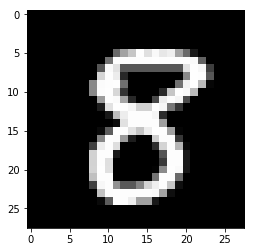

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
# We will build a model with two hidden layers of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [13]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.5211 - acc: 0.8435 - val_loss: 0.1987 - val_acc: 0.9380
Epoch 2/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.2503 - acc: 0.9256 - val_loss: 0.1475 - val_acc: 0.9550
Epoch 3/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.1961 - acc: 0.9419 - val_loss: 0.1300 - val_acc: 0.9603
Epoch 4/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.1705 - acc: 0.9497 - val_loss: 0.1154 - val_acc: 0.9645
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.1530 - acc: 0.9546 - val_loss: 0.1064 - val_acc: 0.9676
Epoch 6/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.1436 - acc: 0.9565 - val_loss: 0.1000 - val_acc: 0.9700
Epoch 7/30
60000/60000 [==============================] - 1s 24us/step - loss: 0

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10730758694201067
Test accuracy: 0.9772


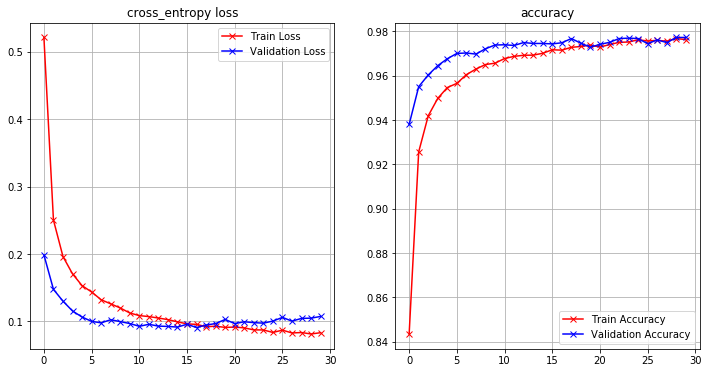

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [16]:
### Build your model here
model_2 = Sequential()
model_2.add(Dense(400, activation= 'relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(400, activation= 'relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation= 'softmax'))

model_2.summary()

In [17]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4010      
Total params: 478,410
Trainable params: 478,410
Non-trainable params: 0
_________________________________________________________________


In [18]:
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])

In [19]:
batch_size = 128
epochs = 20
history_model_2 = model_2.fit(
x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3154 - acc: 0.9036 - val_loss: 0.1179 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1476 - acc: 0.9563 - val_loss: 0.0998 - val_acc: 0.9689
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1148 - acc: 0.9665 - val_loss: 0.0884 - val_acc: 0.9751
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1021 - acc: 0.9706 - val_loss: 0.0825 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0888 - acc: 0.9746 - val_loss: 0.0821 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0810 - acc: 0.9771 - val_loss: 0.0742 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0753 - acc: 0.9781 - val_loss: 0.0946 - val_acc

## SOLUTION

In [20]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0942792717663066
Test accuracy: 0.9813


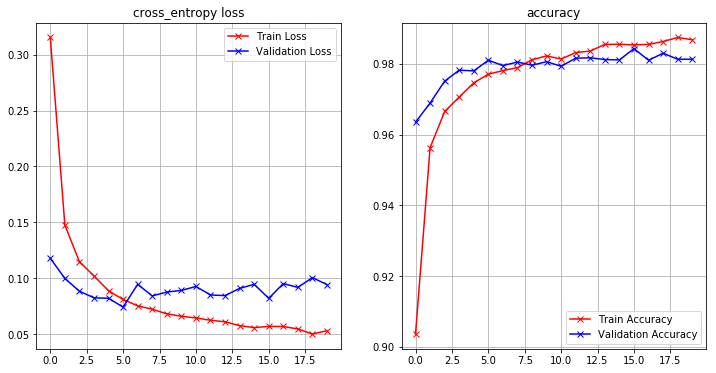

In [21]:
plot_loss_accuracy(history_model_2)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

In [22]:
###########################################################################################
# Answer: 1
#
# The training time applied for both these models turns out to be 1 second apart for each layer
# which roughly takes 3-4 seconds for an epoch on my system.
# However, the accuracy increases in model_2 as compared to modeol_1
# Model_1 statistics conclusion:
# Total Time Consumed: Approx 1 minute (1-2 seconds/epoch)
# loss: 0.0832      Accuracy: 0.9762
# Test loss: 0.10730        Test Accuracy: 0.9772
#
# Model_2 Statistics conclusion:
# Total Time Consumed: Approx 2 minutes (4-5 seconds/epoch)
# loss: 0.0531      Accuracy: 0.9868
# Test loss: 0.09427        Test Accuracy: 0.9813
#
# As per my observations, the model_1 seems to be a better choice, as the parameters are less,
# hence the time taken by each epochs is less, but it would be more affected
# in case of a larger dataset.
# Although, the accuracy is model_2 is better, it's not worth of the effort.
# Also, the loss function in model_2 goes excessively high for epochs 5 to 9,
# which clearly depicts overfitting on training data, which adds up to one more
# reason model_1 is better.

In [24]:
###########################################################################################
# Answer: 2
#
# Model_1:
# Cross Entropy Error Loss and Accuracy:
# loss: 0.0832      Accuracy: 0.9762
# val loss: 0.1073     val acc: 0.9772
#
# Model_2:
# Cross Entropy Error Loss and Accuracy:
# loss: 0.0531      Accuracy: 0.9868
# val loss: 0.0943     val acc: 0.9813
#
# So, cross entropy error loss in model_2 for both test and train data sets
# are closer to each other.
# however, error loss in model_1 for train and test data sets is increasing with
# every epoch, thereby causing overfitting.
#
# Q: Which is more meaningful? loss or accuracy?
# A: Both are equally important. However, in this case, we can observe loss is
# more meaningful than accuracy.

#############################################################################################
# Answer 3
#
# Below is the model_3 that I have tried by reducing the learning rate

In [25]:
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))

In [26]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [27]:
learning_rate = .0001
model_3.compile(loss='categorical_crossentropy',
optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])

In [28]:
batch_size = 128
epochs = 20
history_model_3 = model_3.fit(
x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.8624 - acc: 0.7435 - val_loss: 0.3157 - val_acc: 0.9125
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3709 - acc: 0.8899 - val_loss: 0.2308 - val_acc: 0.9335
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2861 - acc: 0.9150 - val_loss: 0.1884 - val_acc: 0.9440
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2363 - acc: 0.9302 - val_loss: 0.1620 - val_acc: 0.9507
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2047 - acc: 0.9392 - val_loss: 0.1447 - val_acc: 0.9559
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1810 - acc: 0.9458 - val_loss: 0.1304 - val_acc: 0.9605
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1635 - acc: 0.9519 - val_loss: 0.1205 - val_acc

In [29]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07489215170784155
Test accuracy: 0.9776


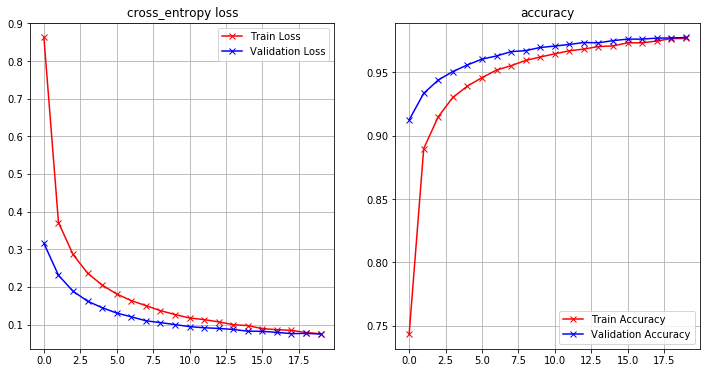

In [30]:
plot_loss_accuracy(history_model_3)

In [31]:
##################################################################################################
# So after we reduce the learning rate from 0.001 to 0.0001, we got better results
# Test loss: 0.07489215170784155
# Test accuracy: 0.9776
# val loss: 0.0749
# val accuracy: 0.9776
# Due to reduction in learning rate, the algorithm doesn't lose the minimum.
#
##################################################################################################3
# Let's try the same model with 25 epochs.

In [32]:
model_4 = Sequential()
model_4.add(Dense(400, activation='relu', input_shape=(784,)))
model_4.add(Dropout(0.4))
model_4.add(Dense(300, activation='relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(10, activation='softmax'))

In [33]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_8 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [34]:
learning_rate = .0001
model_4.compile(loss='categorical_crossentropy',
optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])

In [35]:
batch_size = 128 
epochs = 25
history_model_4 = model_4.fit(
x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 79us/step - loss: 0.8818 - acc: 0.7371 - val_loss: 0.3189 - val_acc: 0.9128
Epoch 2/25
60000/60000 [==============================] - 4s 70us/step - loss: 0.3765 - acc: 0.8880 - val_loss: 0.2373 - val_acc: 0.9320
Epoch 3/25
60000/60000 [==============================] - 4s 70us/step - loss: 0.2897 - acc: 0.9151 - val_loss: 0.1927 - val_acc: 0.9418
Epoch 4/25
60000/60000 [==============================] - 4s 70us/step - loss: 0.2389 - acc: 0.9293 - val_loss: 0.1652 - val_acc: 0.9516
Epoch 5/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.2087 - acc: 0.9388 - val_loss: 0.1468 - val_acc: 0.9560
Epoch 6/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.1840 - acc: 0.9448 - val_loss: 0.1318 - val_acc: 0.9604
Epoch 7/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.1680 - acc: 0.9512 - val_loss: 0.1219 - val_acc

In [36]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0726388050250709
Test accuracy: 0.9792


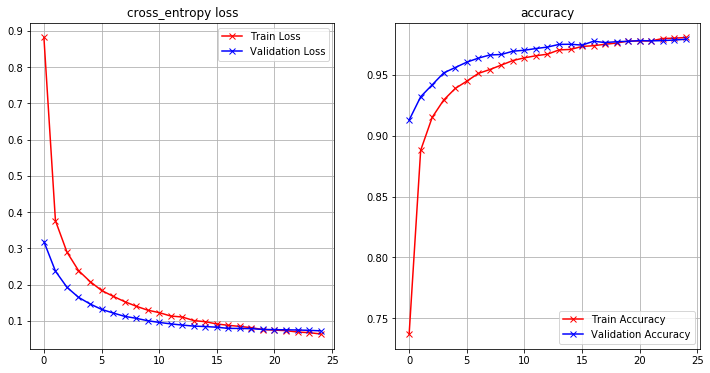

In [37]:
plot_loss_accuracy(history_model_4)

In [38]:
# In model_4, we are getting a slightly better accuracy, with reduced error loss. 
# let's make model_5 with an extra added layer.

In [39]:
model_5 = Sequential()
model_5.add(Dense(400, activation='relu', input_shape=(784,)))
model_5.add(Dropout(0.4))
model_5.add(Dense(300, activation='relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(200, activation='relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(10, activation='softmax'))

In [40]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2010      
Total para

In [41]:
learning_rate = .0001
model_5.compile(loss='categorical_crossentropy',
optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])

In [42]:
batch_size = 128
epochs = 20
history_model_5 = model_5.fit(
x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.0790 - acc: 0.6527 - val_loss: 0.3465 - val_acc: 0.9006
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4475 - acc: 0.8656 - val_loss: 0.2362 - val_acc: 0.9293
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3243 - acc: 0.9033 - val_loss: 0.1879 - val_acc: 0.9414
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2620 - acc: 0.9231 - val_loss: 0.1597 - val_acc: 0.9499
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2226 - acc: 0.9335 - val_loss: 0.1396 - val_acc: 0.9569
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1929 - acc: 0.9425 - val_loss: 0.1278 - val_acc: 0.9621
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1733 - acc: 0.9491 - val_loss: 0.1150 - val_acc

In [43]:
score = model_5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07617409284939058
Test accuracy: 0.9786


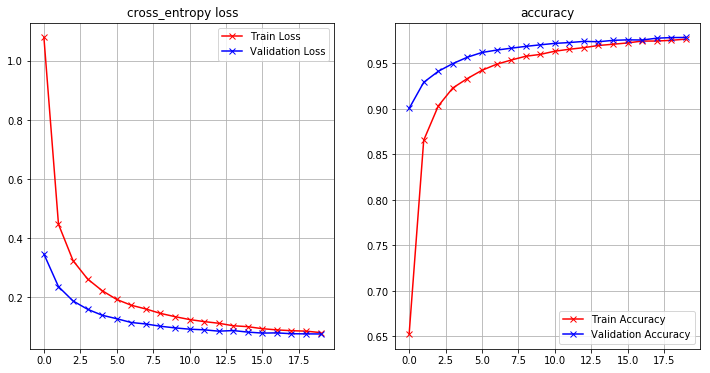

In [44]:
plot_loss_accuracy(history_model_5)

In [45]:
# Even after adding, another layer, no significant improvement can be observed.
# Let's try increasing epochs to 25 for the same model.

In [49]:
model_6 = Sequential()
model_6.add(Dense(400, activation='relu', input_shape=(784,)))
model_6.add(Dropout(0.4))
model_6.add(Dense(300, activation='relu'))
model_6.add(Dropout(0.4))
model_6.add(Dense(200, activation='relu'))
model_6.add(Dropout(0.4))
model_6.add(Dense(10, activation='softmax'))

In [50]:
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_13 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2010      
Total para

In [51]:
learning_rate = .0001
model_6.compile(loss='categorical_crossentropy',
optimizer=RMSprop(lr=learning_rate),
metrics=['accuracy'])

In [52]:
batch_size = 128
epochs = 25
history_model_6 = model_6.fit(
x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 94us/step - loss: 1.1268 - acc: 0.6344 - val_loss: 0.3536 - val_acc: 0.9014
Epoch 2/25
60000/60000 [==============================] - 5s 80us/step - loss: 0.4511 - acc: 0.8638 - val_loss: 0.2377 - val_acc: 0.9283
Epoch 3/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.3289 - acc: 0.9022 - val_loss: 0.1945 - val_acc: 0.9414
Epoch 4/25
60000/60000 [==============================] - 5s 82us/step - loss: 0.2654 - acc: 0.9213 - val_loss: 0.1648 - val_acc: 0.9496
Epoch 5/25
60000/60000 [==============================] - 5s 80us/step - loss: 0.2266 - acc: 0.9336 - val_loss: 0.1469 - val_acc: 0.9561
Epoch 6/25
60000/60000 [==============================] - 5s 80us/step - loss: 0.1979 - acc: 0.9431 - val_loss: 0.1320 - val_acc: 0.9588
Epoch 7/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.1771 - acc: 0.9480 - val_loss: 0.1200 - val_acc

In [53]:
score = model_6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08270377561638888
Test accuracy: 0.9774


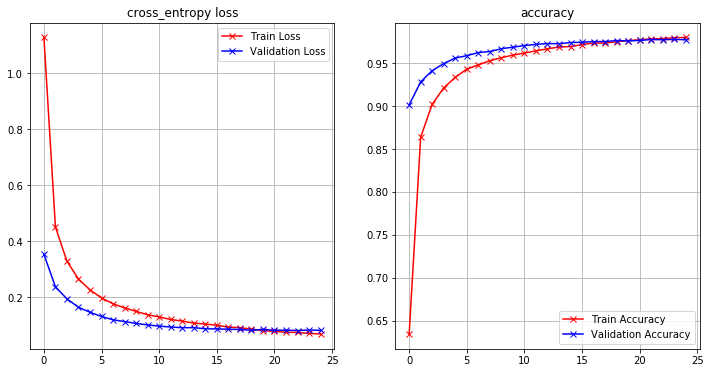

In [54]:
plot_loss_accuracy(history_model_6)

In [55]:
###################################################################################################
#
# Below are the results for model_6:
#
# Test loss: 0.08270377561638888
# Test accuracy: 0.9774
#
# Val loss: 0.0696
# Val accuracy: 0.9774
#
# Below are the results for model_5:
#
# Test loss: 0.07617409284939058
# Test accuracy: 0.9786
#
# Val loss: 0.0762
# Val accuracy: 0.9786